# Численные методы одномерной оптимизации

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Напишем функции для численного нахождения частной производной, градиента и матрицы Гесса для заданной функции в указанной точке.

Для начала выведем все необходимые формулы. Пусть $x \in \mathbb{R}^n$ и $f \in C^1$. Тогда частная производная функции $f(x_1, ..., x_i, ..., x_n)$ по $x_i$ находится по формуле:

$\frac{\partial f}{\partial x_i} = \lim \limits_{\Delta \to 0} \frac{f(x_1, ..., x_i + \Delta, ..., x_n) - f(x_1, ..., x_i, ..., x_n)}{\Delta} $

Градиент находится по следующей формуле:

$\vec{grad(f)} = \nabla f = \begin{pmatrix} \frac{\partial f}{\partial x_1} & ... & \frac{\partial f}{\partial x_i} & ... & \frac{\partial f}{\partial x_n} \end{pmatrix}^T = \begin{pmatrix} \lim \limits_{\Delta \to 0} \frac{f(x_1 + \Delta, ..., x_i, ..., x_n) - f(x_1, ..., x_i, ..., x_n)}{\Delta} & ... & \lim \limits_{\Delta \to 0} \frac{f(x_1, ..., x_i, ..., x_n + \Delta) - f(x_1, ..., x_i, ..., x_n)}{\Delta} \end{pmatrix}^T$

Матрица Гесса выглядит следующим образом:

$H_f = \nabla^2 f = \begin{pmatrix} 
                        \frac{\partial^2 f}{\partial x_1^2} & ... & \frac{\partial^2f}{\partial x_1 \partial x_i} & ... & \frac{\partial^2f}{\partial x_1 \partial x_n}\\
                        ... & ... & ... & ... & ... \\
                        \frac{\partial^2f}{\partial x_i \partial x_1} & ... & \frac{\partial^2f}{\partial x_i^2} & ... & \frac{\partial^2f}{\partial x_i \partial x_n}\\
                        ... & ... & ... & ... & ... \\
                        \frac{\partial^2f}{\partial x_n \partial x_1} & ... & \frac{\partial^2f}{\partial x_n \partial x_i} & ... & \frac{\partial^2f}{\partial x_n^2}\\
                     \end{pmatrix}$
                     
Для неё необходимо, чтобы $f \in C^2$                     
                     
Как можно заметить, для того, чтобы найти матрицу Гесса, нам нужно вывести формулу нахождения частной производной второго порядка по определению, т.е. через предел (поскольку численно производные можно находить только через формулы пределов, подставляя под дельту маленькое число). Итак, выведим формулу частной производной второго порядка по определению:

$\frac{\partial^2f}{\partial x_j \partial x_i} = \lim \limits_{\Delta \to 0} \frac{\frac{\partial f}{\partial x_j}f(x_1, ..., x_i + \Delta, ..., x_j, ..., x_n) - \frac{\partial f}{\partial x_j}f(x_1, ..., x_i, ..., x_j, ..., x_n)}{\Delta} =$

$= \lim \limits_{\Delta \to 0} \frac{\lim \limits_{\Delta \to 0} \frac{f(x_1, ..., x_i + \Delta, ..., x_j + \Delta, ..., x_n) - f(x_1, ..., x_i + \Delta, ..., x_j, ..., x_n)}{\Delta} - \lim \limits_{\Delta \to 0} \frac{f(x_1, ..., x_i, ..., x_j + \Delta, ..., x_n) - f(x_1, ..., x_i, ..., x_j, ..., x_n)}{\Delta}}{\Delta} =$

$ = \lim \limits_{\Delta \to 0} \frac{f(x_1, ..., x_i + \Delta, ..., x_j + \Delta, ..., x_n) - f(x_1, ..., x_i + \Delta, ..., x_j, ..., x_n) - f(x_1, ..., x_i, ..., x_j + \Delta, ..., x_n) + f(x_1, ..., x_i, ..., x_j, ..., x_n)}{\Delta^2}$

Теперь мы можем, используя выведенные формулы написать функции численного нахождения частной производной, градиента и матрицы Гесса для заданной функции в указанной точке.

In [2]:
def diff(f, x, i=0, eps=0.01):
    x_right = np.copy(x)
    x_right[i] += eps
    return (f(x_right) - f(x)) / eps

def grad(f, x, eps=0.01):
    n = len(x)
    E = np.eye(n)
    return np.array([(f(x + eps * E[i]) - f(x)) / eps for i in range(n)])

def hess(f, x, eps=0.01):
    n = len(x)
    E = np.eye(n)
    res = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            res[i, j] = (f(x + eps * E[i] + eps * E[j]) - f(x + eps * E[i]) - f(x + eps * E[j]) + f(x)) / eps**2
            res[j, i] = res[i, j]
    return res

https://alexey-abakumkin.github.io/lectures-sem-2/CM/CM2.pdf

In [3]:
def f(x):
    return np.cos(3 * x) / x ** 2

In [4]:
a, b = 7, 11
eps = 0.01

### Метод дихотомии

In [5]:
def Dichotomy_Method(a, b, eps, f):
    
    delta = 0.001
    k = 0
    
    while b - a > 2 * eps:
        
        k += 1
        
        c = (a + b) / 2 - delta / 2
        d = (a + b) / 2 + delta / 2

        if f(c) <= f(d):
            b = d

        elif f(c) > f(d): 
            a = c

    x_min = (a + b) / 2
    
    return x_min, k

In [6]:
x_min, k = Dichotomy_Method(a, b, eps, f)

print('x* =', x_min)
print('y* =', f(x_min))
print('k =', k)

x* = 9.398337890624997
y* = -0.011285744941784576
k = 8


### Метод Фибоначчи

In [7]:
# Поиск чисел Фибоначчи
def Fi(n):
    
    F1 = 1
    F2 = 1
    
    for __ in range(n):
        F1, F2 = F2, F1 + F2

    return F1

In [8]:
def Fibonacci_Method(a, b, eps, f):
    
    # Ищем количество вычислений n – наименьшее целое число, при котором F(n) >= | b - a | / epsilon
    n = 0
    while Fi(n) < (abs(b - a) / eps):
        n += 1

    k = 0 # количество итераций
    
    # ищем две симметричные относительно центра отрезка точки
    x = a + (b - a) * (Fi(n - 2) / Fi(n))
    y = a + (b - a) * (Fi(n - 1) / Fi(n))
    
    # пока k не равно n-3
    while k != n - 3:

        k += 1
        
        # отбрасываем правый полуинтервал
        if f(x) <= f(y):
            b = y
            y = x
            x = a + (b - a) * (Fi(n - k - 3) / Fi(n - k - 1))
        
        # отбрасываем левый полуинтервал
        elif f(x) > f(y):
            a = x
            x = y
            y = a + (b - a) * (Fi(n - k - 2) / Fi(n - k - 1))

    y = x + eps
    
    # вычисляюем значения функции и находим границы конечного отрезка локализации
    if f(x) <= f(y):
        b = y
    elif f(x) > f(y):
        a = x
    
    x_min = (a + b) / 2
    
    return x_min, k

In [9]:
x_min, k = Fibonacci_Method(a, b, eps, f)

print('x* =', x_min)
print('y* =', f(x_min))
print('k =', k)

x* = 9.397563432941546
y* = -0.011285490110591389
k = 11


### Метод золотого сечения

In [10]:
def Golden_Section_Method(a, b, eps, f):
    
    k = 0
    g1 = (3 - np.sqrt(5)) / 2
    g2 = (np.sqrt(5) - 1) / 2
    
    while (b - a) / 2 > eps:
        
        k += 1
        
        c = (b - a) * g1 + a
        d = (b - a) * g2 + a

        if f(c) <= f(d):
            b = d

        elif f(c) > f(d): 
            a = c

    x_min = (a + b) / 2
    
    return x_min, k

In [11]:
x_min, k = Golden_Section_Method(a, b, eps, f)

print('x* =', x_min)
print('y* =', f(x_min))
print('k =', k)

x* = 9.40087976492303
y* = -0.01128615172911571
k = 12


### Метод Ньютона

In [12]:
def df(x):
    return -(3 * x * np.sin(3 * x) + 2 * np.cos(3 * x)) / x ** 3

def d2f(x):
    return -(9 * x ** 2 * np.cos(3 * x) - 12 * x * np.sin(3 * x) - 6 * np.cos(3 * x)) / x ** 4

In [13]:
def Newton_Method(a, b, eps, x0, df, d2f):
    
    k = 0
    
    while abs(df(x0)) > eps:
        
        k += 1
        
        x1 = x0  - df(x0) / d2f(x0)
        x0 = x1
        
    return x0, k

In [14]:
x0 = 9
x_min, k = Newton_Method(a, b, eps, x0, df, d2f)

print('x0 =', x0)
print('x* =', x_min)
print('y* =', f(x_min))
print('k =', k)

x0 = 9
x* = 9.421535963704624
y* = -0.011265125598276807
k = 3


In [15]:
x = np.linspace(a, b, 100)
min(f(x))

-0.01866230150050075

### Метод касательных

In [18]:
def Tangent_Method(a, b, eps): 
        
        C_list = []
        
        while abs(b - a) > eps:

            if df(a) >= 0:
                return a

            elif df(b) <= 0:
                return b

            else:
                C = (f(a) - f(b) + b * df(b) - a * df(a)) / (df(b) - df(a))
                
                if df(C) == 0:
                    return C
               
                else:
                    if df(C) > 0:
                        b = C
                    if df(C) < 0:
                        a = C      
            
            C_list.append(C)
            
        return C, C_list

In [19]:
def f(x):
    return x ** 2 - np.sin(x)
def df(x):
    return 2 * x - np.cos(x)

a, b = 0, np.pi/2
eps = 0.01

In [20]:
x_min, C_list = Tangent_Method(a, b, eps)

print('x* =', x_min)
print('y* =', f(x_min))
print('k =', k)

x* = 0.44697662186151804
y* = -0.23245305771555674
k = 3


Text(0, 0.5, 'y')

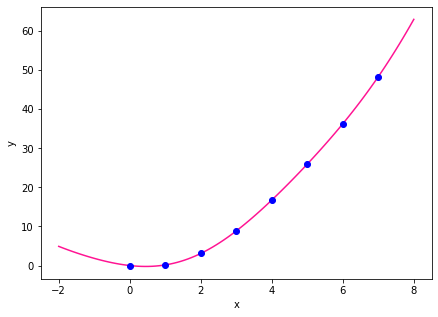

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))
x = np.linspace(-2, 8, 100)
y = f(x)

ax.plot(x, y, color='DeepPink')
for i in range(len(C_list)):
    ax.plot(i, f(i), 'o', color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')

### Метод ломаных

In [27]:
def Lipschitz_Сonstant(a, b):
    
    L = 0
    x = np.linspace(a, b, 1000)
    
    for i in range(len(x) - 1):
        
        x1 = x[i]
        x2 = x[i + 1]
        
        L_tmp = abs(f(x1) - f(x2)) / abs(x1 - x2)
        
        if L_tmp > L:
            L = L_tmp
            
    return L

In [28]:
def Broken_Line_Method(a, b, eps, f):        
    
    L = Lipschitz_Сonstant(a, b) # потоянная Липшица
    x = np.linspace(a, b, 10) # 10 точек испытаний
    y = [f(i) for i in x] # значение функции в этих точках
    k = 0
        
    while True:      
        
        k += 1
        
        y_min = min(y) # минимум функции в точках ипытаний
        x_min = x[0]
        min_val = y[0]
        min_index = 0
        
        for i in range(len(x) - 1):
            
            # значение х в точках пересечения соседних ветвей миноранты:
            x_mean = (y[i] - y[i+1] + L * (x[i] + x[i+1])) / (2 * L) 
            # значение у в точках пересечения соседних ветвей миноранты:
            y_mean = y[i] - L * (x_mean - x[i])
            
            # поиск точки минимума миноранты:
            if y_mean < min_val:                
                min_val = y_mean
                min_index = i
                x_min = x_mean
        
        # точка минимума миноранты:
        x_minorant = x_min

        # добавляем точку минимума миноранты и её значение к точкам испытаний:
        x = np.concatenate((x[:min_index + 1], [x_minorant], x[min_index + 1:]))
        # добавляем значение миноранты к точкам испытаний:
        y = np.concatenate((y[:min_index + 1], [f(x_minorant)], y[min_index + 1:]))
        
        # условие остановки:
        if np.abs(y_min - f(x_minorant)) <= eps:
            return x_minorant, x, L, k

In [29]:
def f(x):
    return np.cos(3 * x) / x ** 2

a, b = 7, 11
eps = 0.01

In [30]:
x_min, xx, L, k = Broken_Line_Method(a, b, eps, f)
print('х* = ', x_min)
print('f* = ', f(x_min))
print('k =', k)

х* =  7.281193006621897
f* =  -0.018657303826596337
k = 1


In [31]:
# ломанные:
lines_x = []
lines_y = []
values = f(xx)

for i in range(len(xx) - 1):
    
    x = xx[i]
    y = f(x)
    
    x_mean = (values[i] - values[i+1] + L * (xx[i] + xx[i+1])) / (2 * L)
    y_mean = values[i] - L * (x_mean - xx[i])
    
    lines_x.append(x)
    lines_x.append(x_mean)
    lines_y.append(y)
    lines_y.append(y_mean)

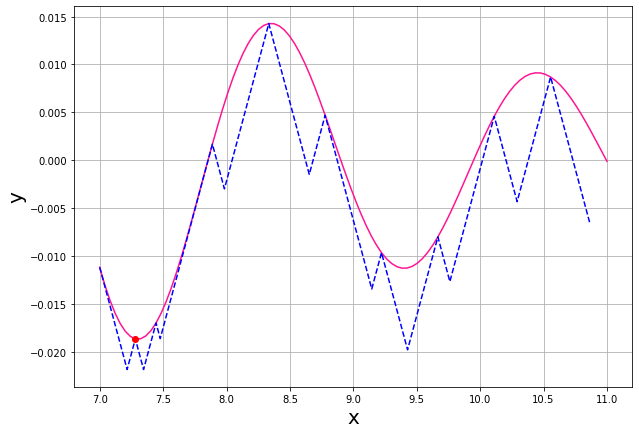

In [32]:
# изобразим метод ломанных на графике:
fig, ax = plt.subplots(figsize=(10, 7))
x = np.linspace(7, 11, 100)
y = f(x)

ax.plot(x, y, color='DeepPink')
ax.plot(lines_x, lines_y,  '--', color='blue')
ax.plot(x_min, f(x_min), 'o', color='red')
ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.grid()